In [2]:
import numpy as np
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [3]:
i= pd.read_csv('IRIS.csv')
i.tail(20)

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


In [4]:
i.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


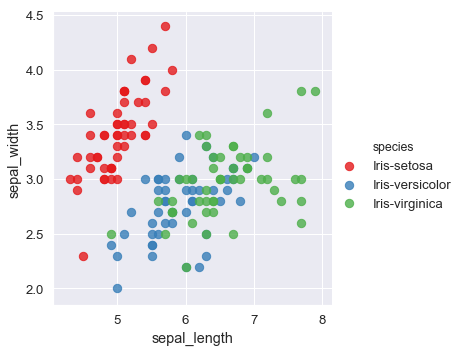

In [5]:
sns.lmplot('sepal_length', 'sepal_width', data=i, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [8]:
# format or preprocess data
type_label = np.where(i['species']==0, 0, 1)
i_features= i.columns.values[:4].tolist()
i_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

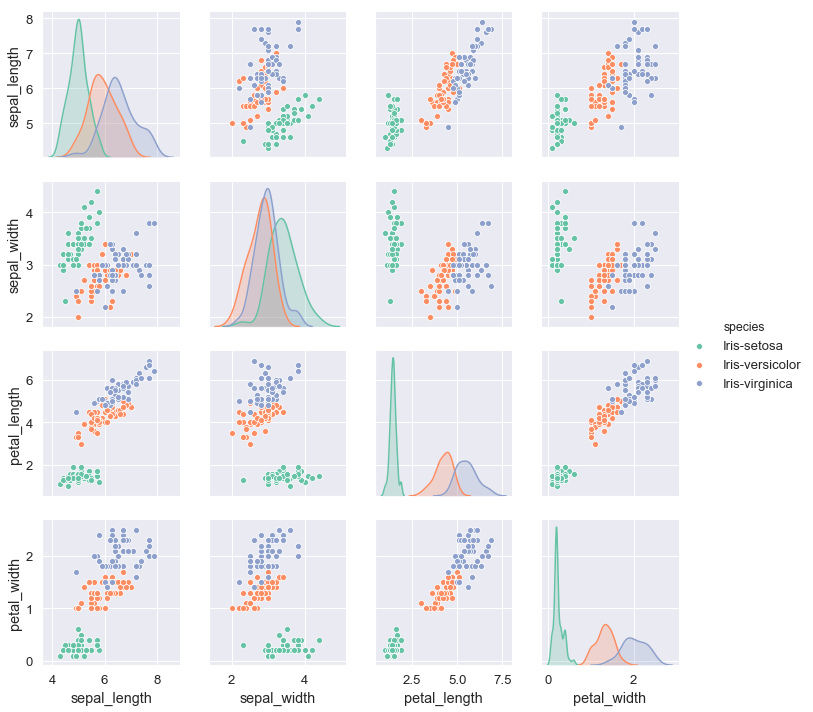

In [20]:
sns.pairplot(data=i, hue='species', palette='Set2')

In [21]:
from sklearn.model_selection import train_test_split
x=i.iloc[:,:-1]
y=i.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)


In [22]:
from sklearn.svm import SVC
model=SVC()

In [23]:
model.fit(x_train, y_train)

C:\Users\katya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
pred=model.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 21  1]
 [ 0  0 10]]


In [27]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.98        22
 Iris-virginica       0.91      1.00      0.95        10

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

